In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [28]:
df = pd.read_csv("/Users/sarahboller/Desktop/CF Achievement 6/02 Data/Host Since Count Time Data.csv", index_col = False)

In [29]:
df.head()

,Month_Year,Cumulative Total
0,3/1/08,4
1,6/1/08,5
2,7/1/08,26
3,8/1/08,41
4,9/1/08,64


<Axes: xlabel='Month_Year'>

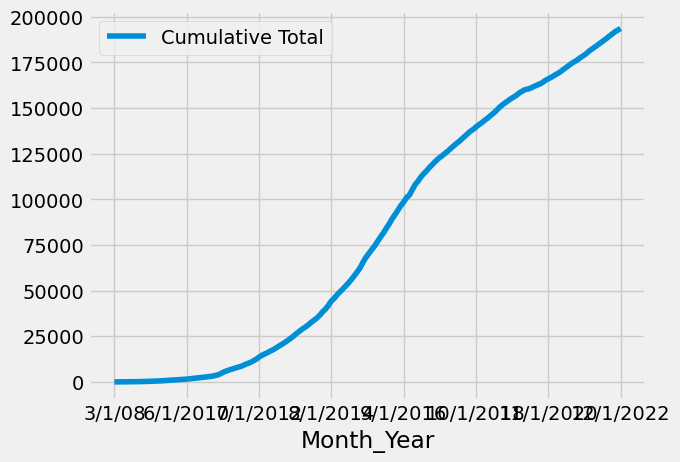

In [31]:
# Line Chart
df.plot.line(x= 'Month_Year', y='Cumulative Total')

In [32]:
# Set the "Date" column as the index

from datetime import datetime

df['datetime'] = pd.to_datetime(df['Month_Year']) # Create a datetime column from "Date.""
df = df.set_index('datetime') # Set the datetime as the index of the dataframe.
df.drop(['Month_Year'], axis=1, inplace=True) # Drop the "Date" column.
df.head()

,Cumulative Total
datetime,
2008-03-01,4
2008-06-01,5
2008-07-01,26
2008-08-01,41
2008-09-01,64


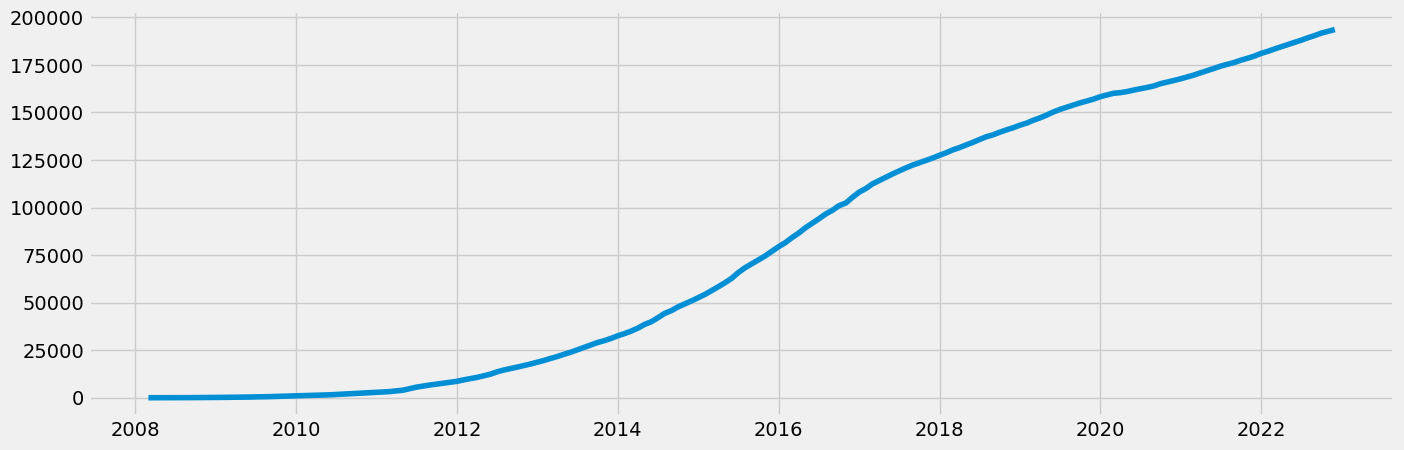

In [33]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

In [44]:
y = df['Cumulative Total'].resample('M').sum()

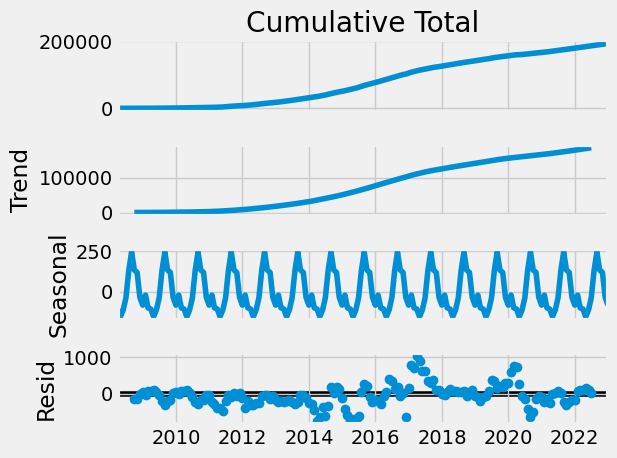

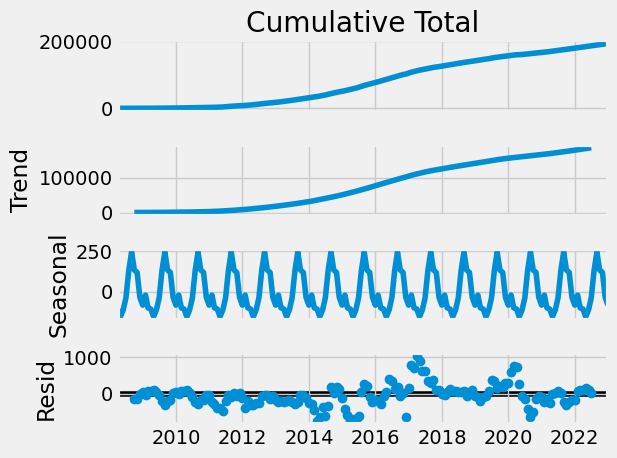

In [46]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()

In [49]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Cumulative Total'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.224486
p-value                          0.662975
Number of Lags Used              5.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


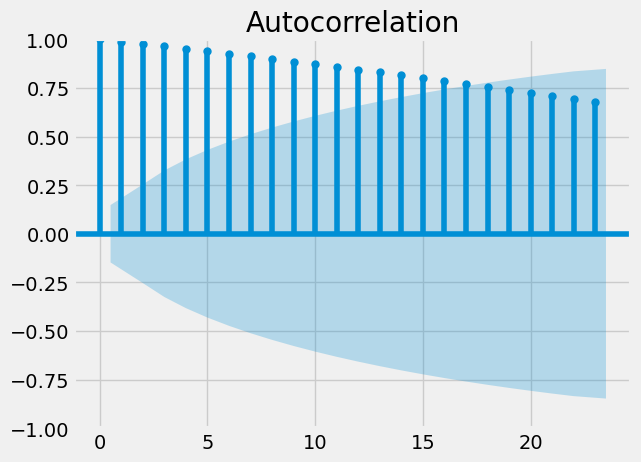

In [50]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()